In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset with low_memory=False to suppress DtypeWarning
df = pd.read_csv("accepted_2007_to_2018Q4.csv", low_memory=False)

In [3]:
# Filter out loan status entries
target = ['Current']
loan_main = df.loc[~df['loan_status'].isin(target)].copy()
loan_main['loan_status'] = np.where(loan_main['loan_status'].str.contains('Fully'), 'Fully Paid', 'Charged Off')

In [4]:
loan_main['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [5]:
loan_main.shape

(1382384, 151)

In [6]:
# Display the first few rows of the filtered dataset
print("\nFirst few rows of the filtered dataset:")
df.head()


First few rows of the filtered dataset:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Summary statistics for numeric variables
numeric_vars = ['installment']
print("\nSummary statistics for numeric variables:")
df[numeric_vars].groupby(df['loan_status']).describe()


Summary statistics for numeric variables:


installment              \
                                                         count        mean   
loan_status                                                                  
Charged Off                                           268559.0  465.147994   
Current                                               878317.0  455.755848   
Default                                                   40.0  438.939250   
Does not meet the credit policy. Status:Charged...       761.0  305.158804   
Does not meet the credit policy. Status:Fully Paid      1988.0  287.069225   
Fully Paid                                           1076751.0  431.323226   
In Grace Period                                         8436.0  519.533225   
Late (16-30 days)                                       4349.0  512.877211   
Late (31-120 days)                                     21467.0  500.393730   

                                                                       \
                                                           std    min   
loan_status                                                             
Charged Off                                         262.774106  21.62   
Current                                             274.217010  29.76   
Default                                             323.116379  50.45   
Does not meet the credit policy. Status:Charged...  213.064911  15.91   
Does not meet the credit policy. Status:Fully Paid  203.934936  15.67   
Fully Paid                                          260.759563   4.93   
In Grace Period                                     288.367825  31.15   
Late (16-30 days)                                   296.993295   7.61   
Late (31-120 days)                                  285.781202  30.12   

                                                                               \
                                                         25%      50%     75%   
loan_status                                                                     
Charged Off                                         275.2900  402.830  605.31   
Current                                             256.9200  383.160  609.06   
Default                                             217.7375  311.670  596.68   
Does not meet the credit policy. Status:Charged...  158.3100  246.750  397.97   
Does not meet the credit policy. Status:Fully Paid  135.8400  230.495  390.54   
Fully Paid                                          240.9200  368.260  573.06   
In Grace Period                                     303.3925  464.705  683.46   
Late (16-30 days)                                   289.2200  447.830  690.26   
Late (31-120 days)                                  286.3000  434.890  664.20   

                                                             
                                                        max  
loan_status                                                  
Charged Off                                         1717.63  
Current                                             1714.54  
Default                                             1328.39  
Does not meet the credit policy. Status:Charged...   926.83  
Does not meet the credit policy. Status:Fully Paid   940.14  
Fully Paid                                          1719.83  
In Grace Period                                     1544.87  
Late (16-30 days)                                   1494.51  
Late (31-120 days)                                  1691.28

In [8]:
# Check for missing values
print("\nMissing values:")
df.isnull().sum()


Missing values:


id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [9]:
loan_main.to_csv('EDA visualization.csv', columns=['fico_range_high', 'fico_range_low', 'grade', 'sub_grade', 'purpose', 'int_rate', 'verification_status', 'annual_inc', 'home_ownership', 'loan_status', 'zip_code'])

## Exploratory Data Analysis (EDA)

`loan_amnt`

In [10]:
loan_main['loan_amnt'].describe()

count    1.382351e+06
mean     1.447770e+04
std      8.753375e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, 'Amount in USD')]

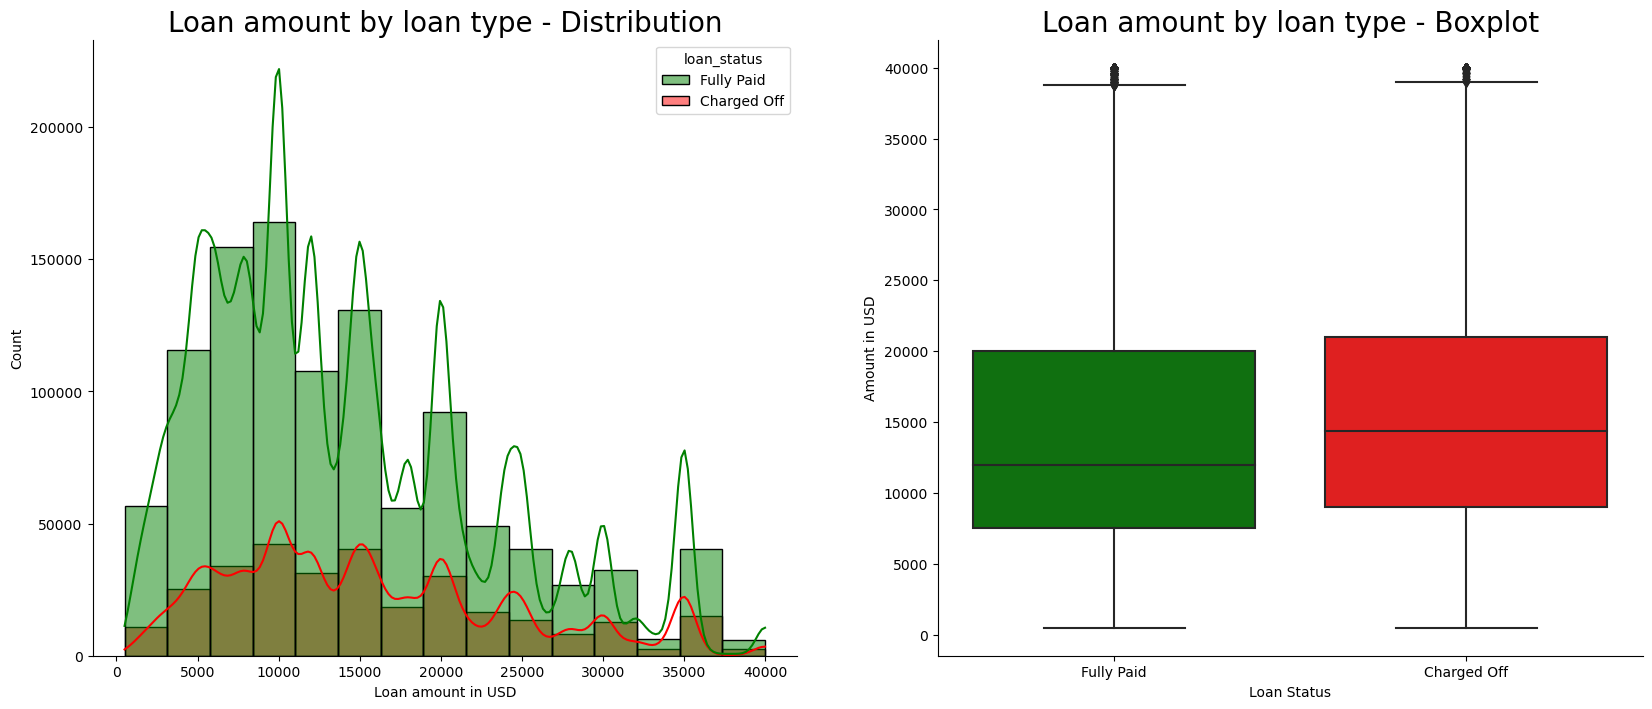

In [11]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='Loan amount in USD', ylabel='')
ax[0].set_title('Loan amount by loan type - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('Loan amount by loan type - Boxplot', size=20)

sns.histplot(data=loan_main,x="loan_amnt",hue="loan_status",bins=15,
             kde=True,ax=ax[0], palette={'Fully Paid':'green', 'Charged Off':'red'})
sns.boxplot(data=loan_main,x="loan_status",y="loan_amnt",ax=ax[1], palette={'Fully Paid':'green', 'Charged Off':'red'}).set(xlabel='Loan Status', 
                                                                                                                        ylabel='Amount in USD')

As observed in the histogram plot, `loan_amnt`'s distribution is right skewed. From looking at the boxplot, the feature descriptively looks pretty much normal with relatively low number of outliers.

`revol_bal`

In [12]:
loan_main['revol_bal'].describe()

count    1.382351e+06
mean     1.625139e+04
std      2.243732e+04
min      0.000000e+00
25%      5.925000e+03
50%      1.111900e+04
75%      1.974000e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

[Text(0.5, 0, 'Loan status'), Text(0, 0.5, 'Amount in USD')]

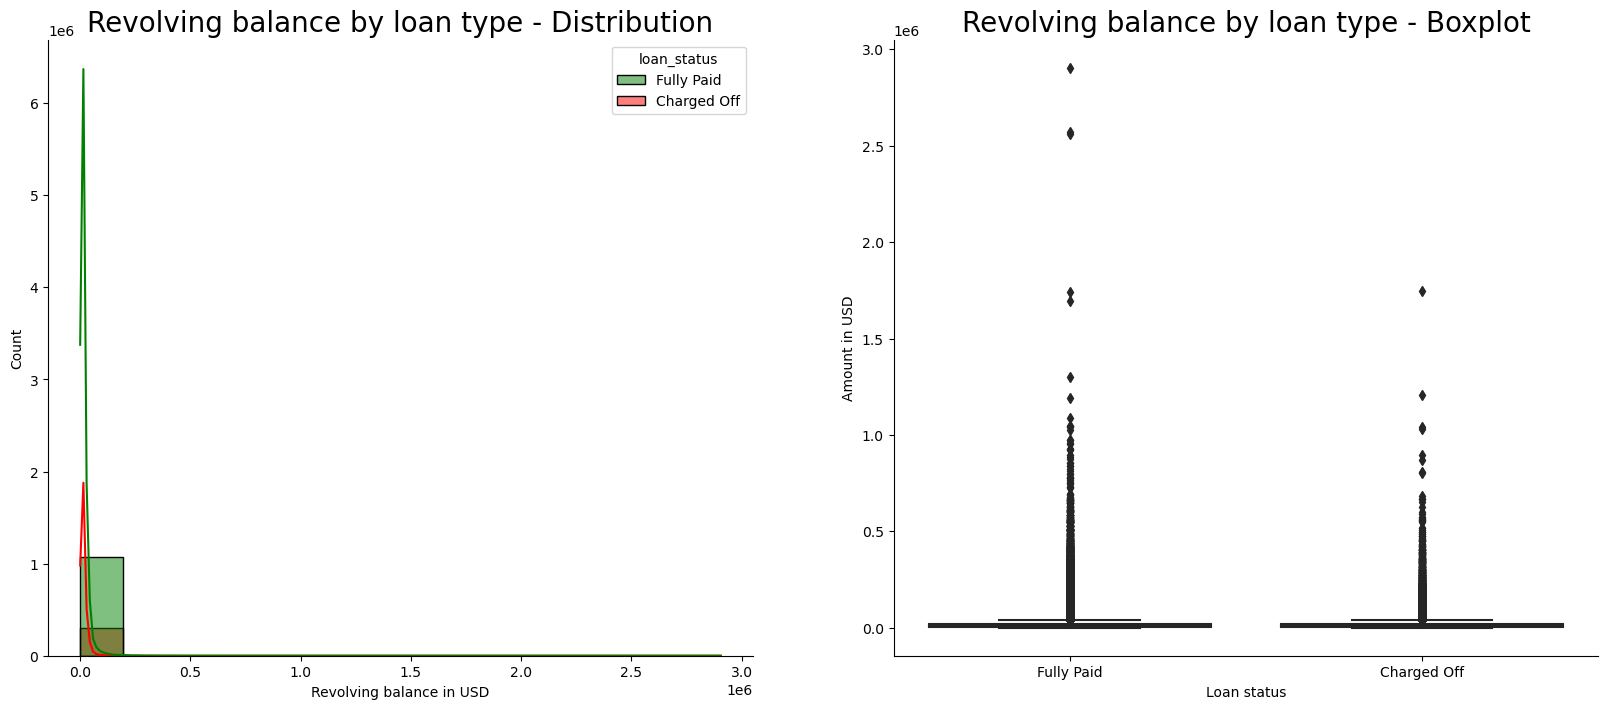

In [13]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='Revolving balance in USD', ylabel='')
ax[0].set_title('Revolving balance by loan type - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('Revolving balance by loan type - Boxplot', size=20)

sns.histplot(data=loan_main,x="revol_bal",hue="loan_status",bins=15,
             kde=True,ax=ax[0],palette = {'Fully Paid': 'green', 'Charged Off': 'red'})
sns.boxplot(data=loan_main,x="loan_status",y="revol_bal",ax=ax[1],palette = {'Fully Paid': 'green', 'Charged Off': 'red'}).set(xlabel='Loan status',
                                                                                                                        ylabel='Amount in USD')

By looking at the boxplot, the feature seems to be right skewed. Also, it seems like there are a lot of outliers within the feature. 

`fico_range_high`

In [14]:
loan_main['fico_range_high'].describe()

count    1.382351e+06
mean     7.000640e+02
std      3.179235e+01
min      6.140000e+02
25%      6.740000e+02
50%      6.940000e+02
75%      7.140000e+02
max      8.500000e+02
Name: fico_range_high, dtype: float64

[Text(0.5, 0, 'Loan status'), Text(0, 0.5, 'FICO score high range')]

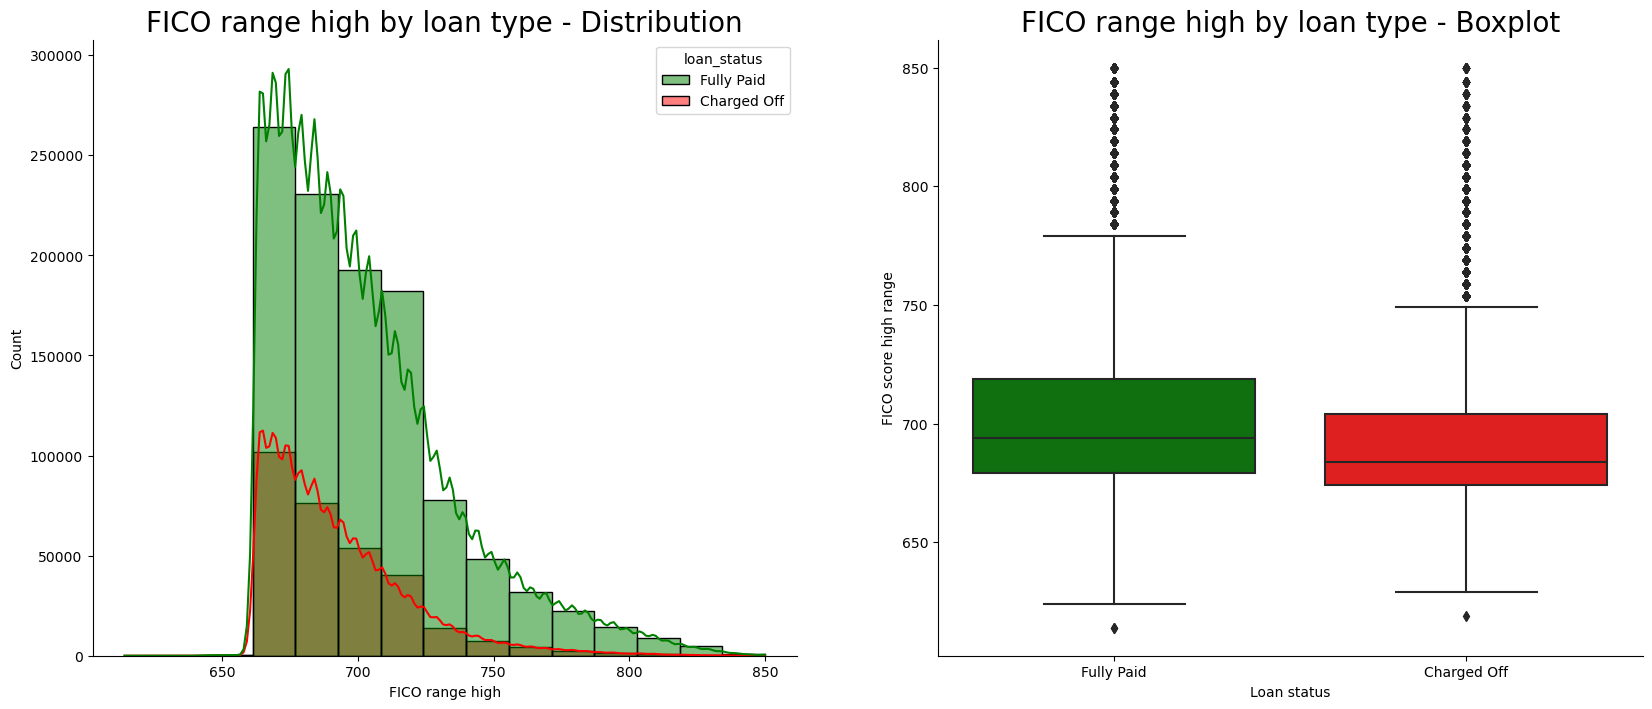

In [15]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='FICO range high', ylabel='')
ax[0].set_title('FICO range high by loan type - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('FICO range high by loan type - Boxplot', size=20)

sns.histplot(data=loan_main,x="fico_range_high",hue="loan_status",bins=15,
             kde=True,ax=ax[0], palette = {'Fully Paid': 'green', 'Charged Off': 'red'})
sns.boxplot(data=loan_main,x="loan_status",y="fico_range_high",ax=ax[1], palette = {'Fully Paid': 'green', 'Charged Off': 'red'}).set(xlabel='Loan status',
                                                                                                                               ylabel='FICO score high range')

`fico_range_low`

In [16]:
loan_main['fico_range_low'].describe()

count    1.382351e+06
mean     6.960639e+02
std      3.179170e+01
min      6.100000e+02
25%      6.700000e+02
50%      6.900000e+02
75%      7.100000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64

[Text(0.5, 0, 'Loan status'), Text(0, 0.5, 'FICO score low range')]

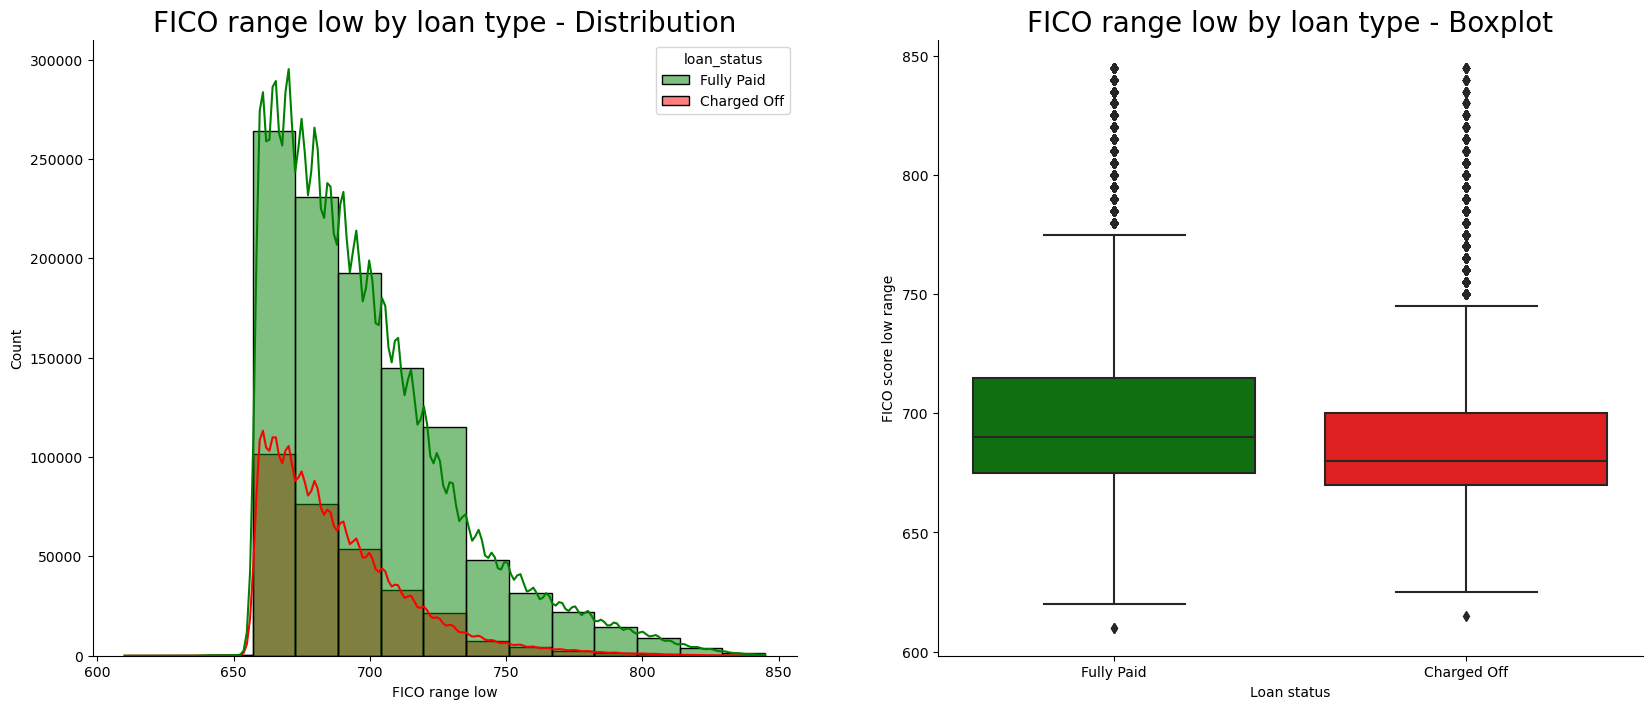

In [17]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='FICO range low', ylabel='')
ax[0].set_title('FICO range low by loan type - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('FICO range low by loan type - Boxplot', size=20)

sns.histplot(data=loan_main,x="fico_range_low",hue="loan_status",bins=15,
             kde=True,ax=ax[0], palette = {'Fully Paid': 'green', 'Charged Off': 'red'})
sns.boxplot(data=loan_main,x="loan_status",y="fico_range_low",ax=ax[1], palette = {'Fully Paid': 'green', 'Charged Off': 'red'}).set(xlabel='Loan status',
                                                                                                                              ylabel='FICO score low range')

`fico_range_high` and `fico_range_low` has pretty similar distribution. This is expected since FICO scores typically follow a range. Consider taking the average of these two features since it won't change their distribution all that much.

`purpose`

First, let's investigate the number of unique entries contained within the feature.

In [18]:
loan_main['purpose'].nunique()

14

In [19]:
loan_main['purpose'].unique().tolist()

['debt_consolidation',
 'small_business',
 'home_improvement',
 'major_purchase',
 'credit_card',
 'other',
 'house',
 'vacation',
 'car',
 'medical',
 'moving',
 'renewable_energy',
 'wedding',
 'educational',
 nan]

Investigate the number of each loan applications on each loan `purpose` with respect to `loan_status`.

<Axes: xlabel='purpose', ylabel='count'>

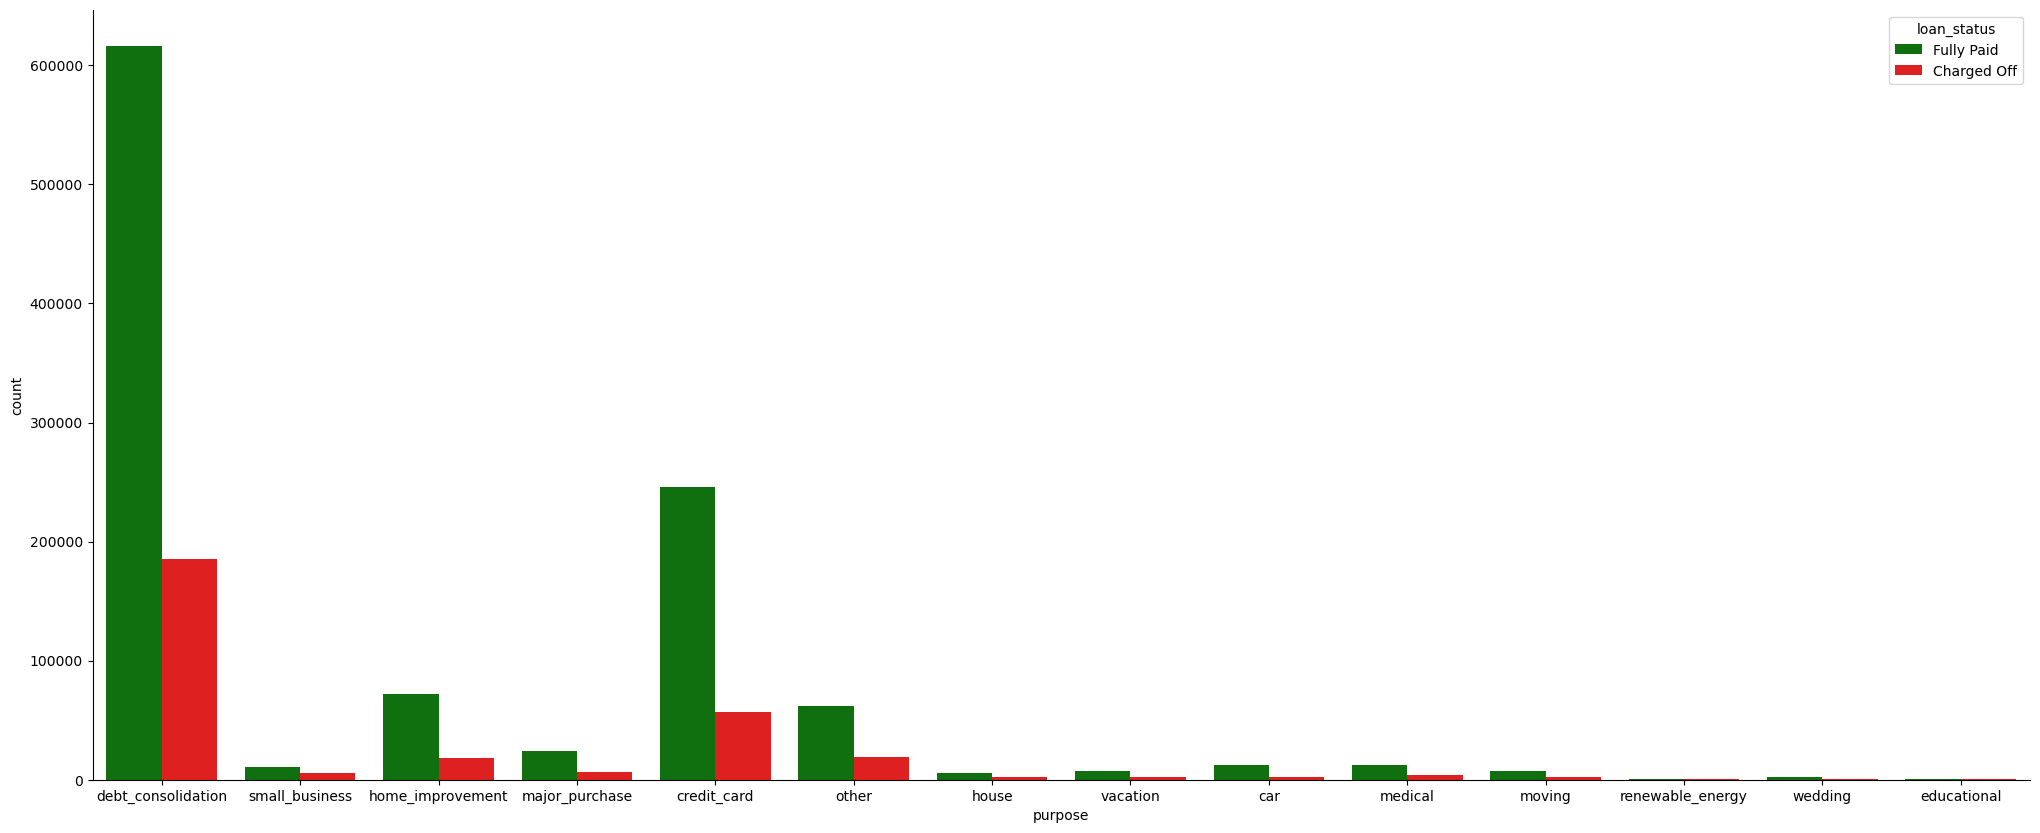

In [20]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.despine()
sns.countplot(data=loan_main, x='purpose', hue='loan_status', palette = {'Fully Paid': 'green', 'Charged Off': 'red'})

Based on the graph, `debt_consolidation`, `home_improvement`, and `credit_card` have the highest number of charged off loans. However, it is quite hard to conclude the percentage of charge off loans for each category. Therefore, we create a table calculating the percentage of charged off loans for each purpose.

In [21]:
df_co = loan_main[loan_main['loan_status'] == 'Charged Off'].groupby('purpose').count()[['loan_status']]

df_total = loan_main.groupby('purpose').count()[['loan_status']]

percent_co = df_co / df_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,purpose,Percentage Charged Off Loans
0,car,16.415814
1,credit_card,18.721349
2,debt_consolidation,23.123714
3,educational,20.803783
4,home_improvement,19.878949
5,house,24.894570
6,major_purchase,20.915398
7,medical,24.030380
8,moving,25.586376
9,other,23.509315


`small_business`, `renewable_energy`, and `moving` have the highest percentage of charged off loans.

`dti`

In [22]:
loan_main['dti'].describe()

count    1.381939e+06
mean     1.832105e+01
std      1.135280e+01
min     -1.000000e+00
25%      1.180000e+01
50%      1.763000e+01
75%      2.409000e+01
max      9.990000e+02
Name: dti, dtype: float64

`dti` should not be negative as a negative DTI ratio would imply either negative debt (which doesn't make sense in this context, as you can't owe negative money) or negative income (which would indicate that you are paying to work, rather than earning from work). Both scenarios are not feasible in standard financial practice. Let's inspect how many data points has a negative value.

In [23]:
loan_main[loan_main['dti'] < 0]['dti'].value_counts()

-1.0    2
Name: dti, dtype: int64

There are 2 data points within this feature having negative value. Further processing should be performed on this two instances. Recommend dropping these points as they don't represent the majority of the data.

[Text(0.5, 0, 'Loan status'), Text(0, 0.5, 'dti')]

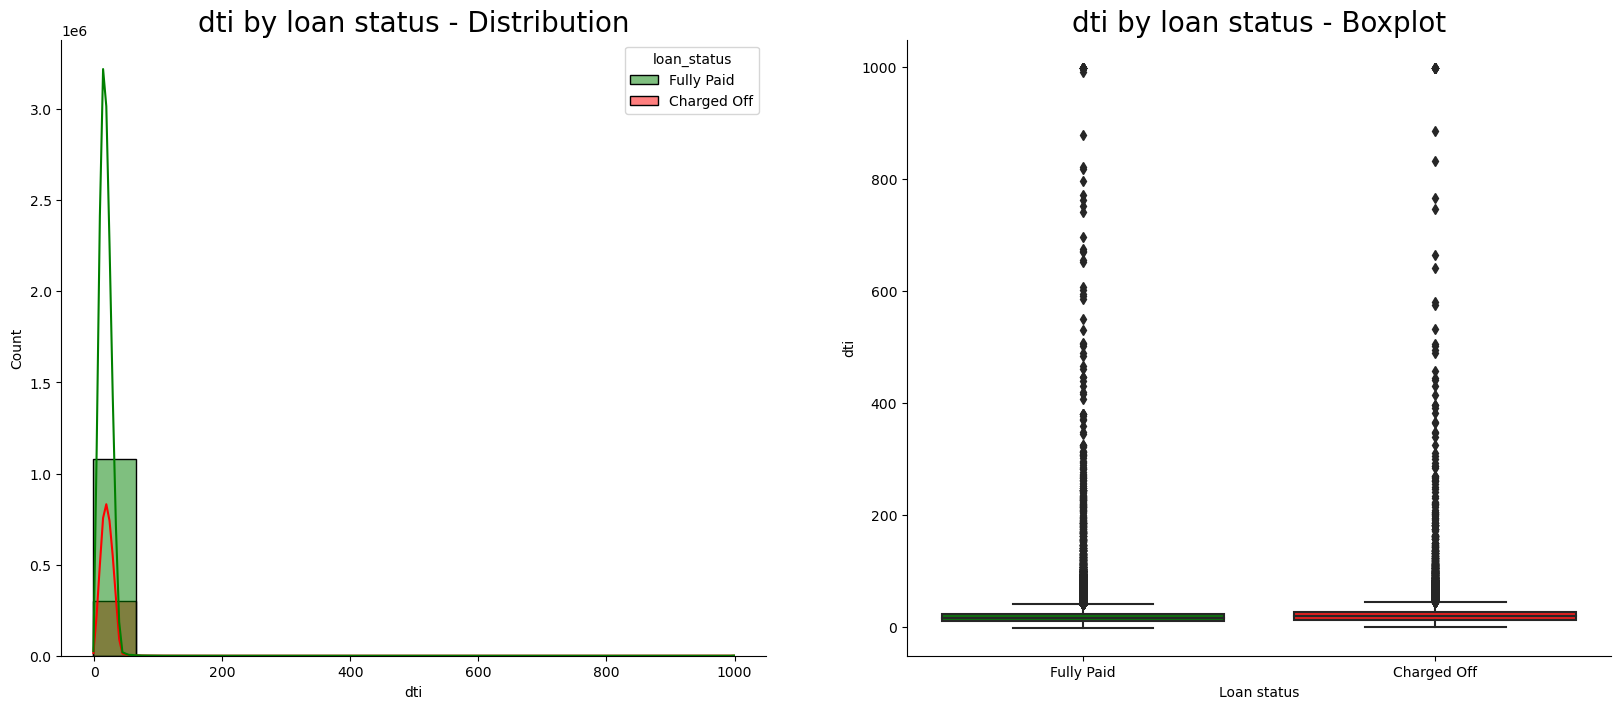

In [24]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='dti', ylabel='')
ax[0].set_title('dti by loan status - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('dti by loan status - Boxplot', size=20)

sns.histplot(data=loan_main,x="dti",hue="loan_status",bins=15,
             kde=True,ax=ax[0], palette = {'Fully Paid': 'green', 'Charged Off': 'red'})
sns.boxplot(data=loan_main,x="loan_status",y="dti",ax=ax[1], palette = {'Fully Paid': 'green', 'Charged Off': 'red'}).set(xlabel='Loan status',
                                                                                                                   ylabel='dti')

By looking at the boxplot, this feature is right skewed with numerous outliers.

`issue_d` 

Convert `issue_d` column to DateTime type

In [25]:
loan_main['issue_d'] = pd.to_datetime(df['issue_d'])

Create a year column

In [26]:
loan_main['year'] = loan_main['issue_d'].dt.year

<Axes: xlabel='year', ylabel='count'>

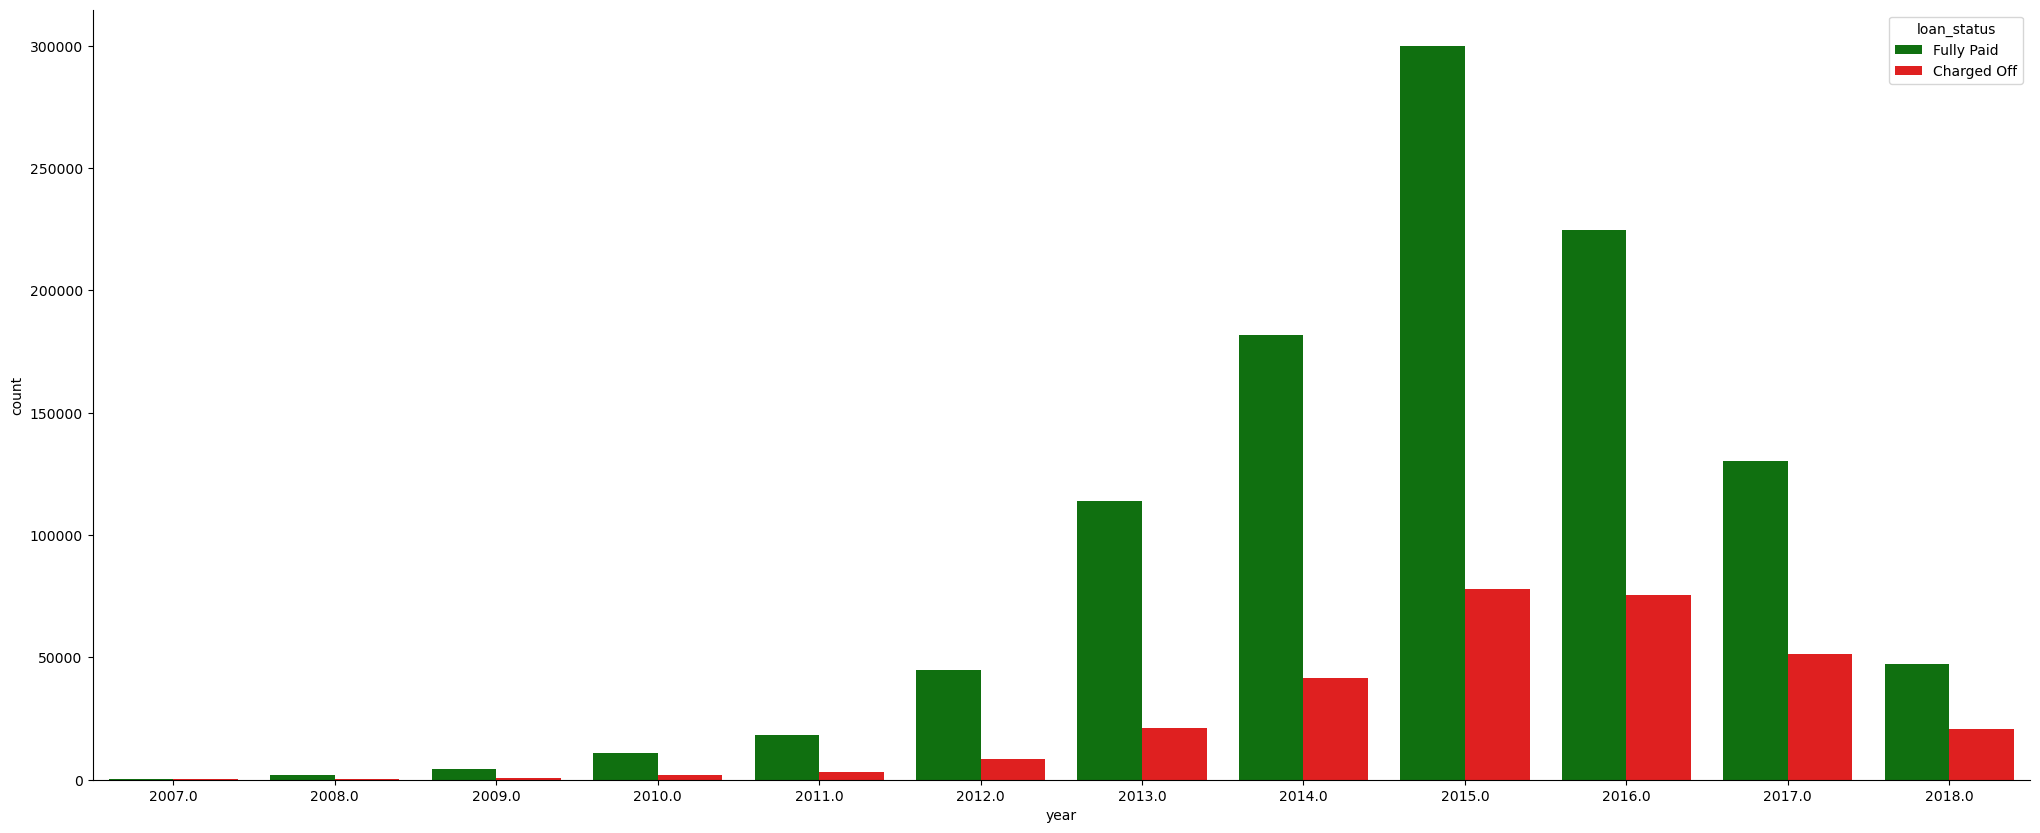

In [27]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.despine()
sns.countplot(data=loan_main, x='year', hue='loan_status', palette = {'Fully Paid': 'green', 'Charged Off': 'red'})

Based on the graph, the period from 2013 to 2017 has the highest number of loan applications. However, we can't see the percentage of charged off loans within each year. Let's create a table to calculate this.

In [28]:
df_co = loan_main[loan_main['loan_status'] == 'Charged Off'].groupby('year').count()[['loan_status']]

df_total = loan_main.groupby('year').count()[['loan_status']]

percent_co = df_co / df_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,year,Percentage Charged Off Loans
0,2007.0,26.202322
1,2008.0,20.727121
2,2009.0,13.690589
3,2010.0,14.014517
4,2011.0,15.178859
5,2012.0,16.197275
6,2013.0,15.598481
7,2014.0,18.671047
8,2015.0,20.660356
9,2016.0,25.135344


Based on the table, `2016`, `2017`, and `2018` are the years with the highest percentage of charged off loans.

`verification_status`

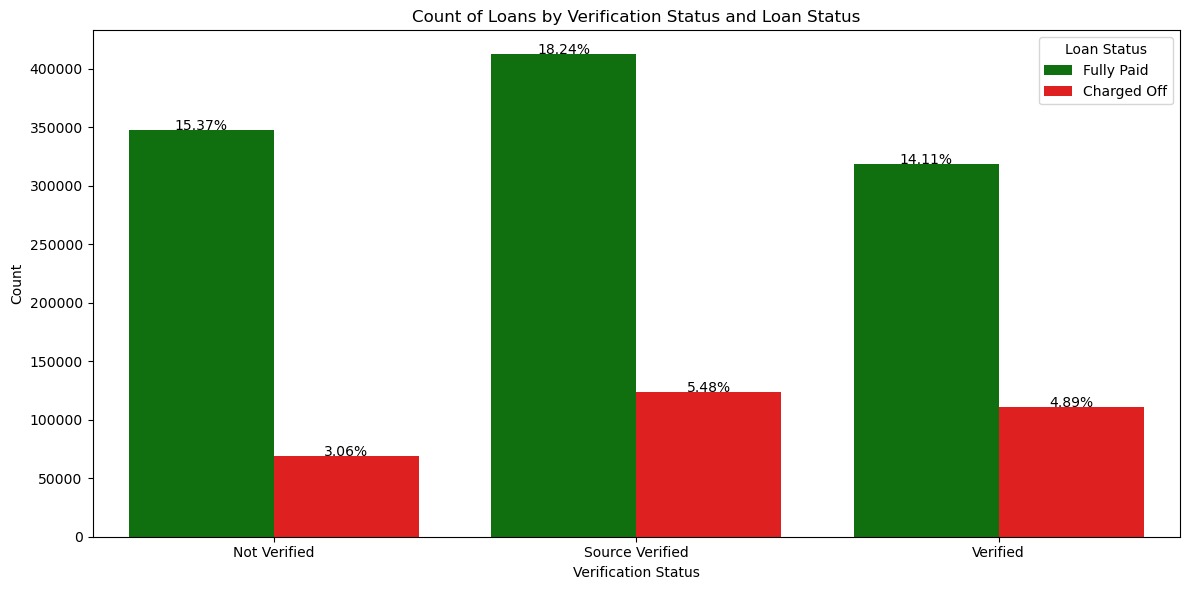

In [29]:
# Countplot of verification status by loan status
plt.figure(figsize=(12, 6))  
ax = sns.countplot(x='verification_status', hue='loan_status', data=loan_main,
              palette={'Charged Off': 'red', 'Fully Paid': 'green'})

# Calculate percentage for each bar
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.title('Count of Loans by Verification Status and Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout() 
plt.show()

As all the green bars (fully paid) are much taller than the red bars (charged off), the majority of loans are fully paid – indicating a higher success rate compared to charged off loans.

`installment`

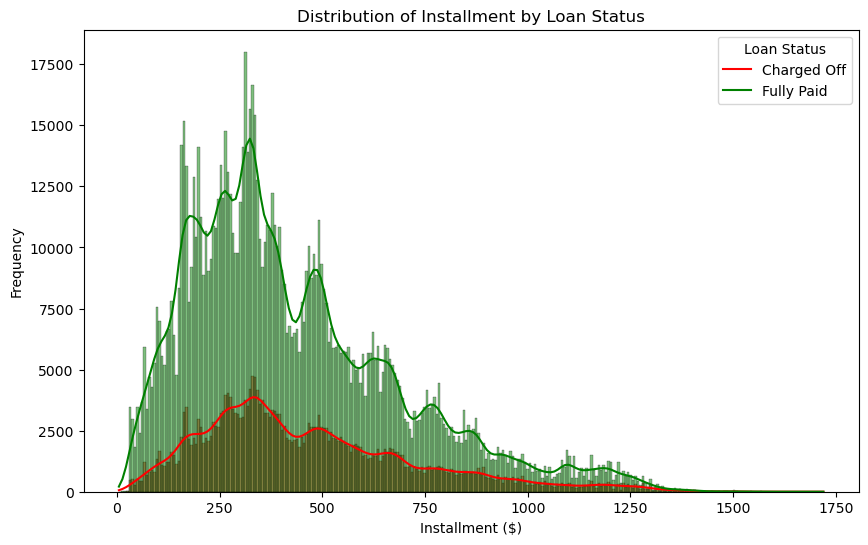

In [30]:
# Distribution of installment by loan status
plt.figure(figsize=(10, 6))
sns.histplot(loan_main, x='installment', hue='loan_status', kde=True, palette={'Charged Off': 'red', 'Fully Paid': 'green'}, legend=True)
plt.title('Distribution of Installment by Loan Status')
plt.xlabel('Installment ($)')
plt.ylabel('Frequency')
plt.legend(title='Loan Status', labels=['Charged Off', 'Fully Paid'])
plt.show()

The distribution of installment amounts is right-skewed for both fully paid and charged off loans. Green (fully paid) distribution has a higher peak compared to the red (charged off) distribution.

`emp_length`

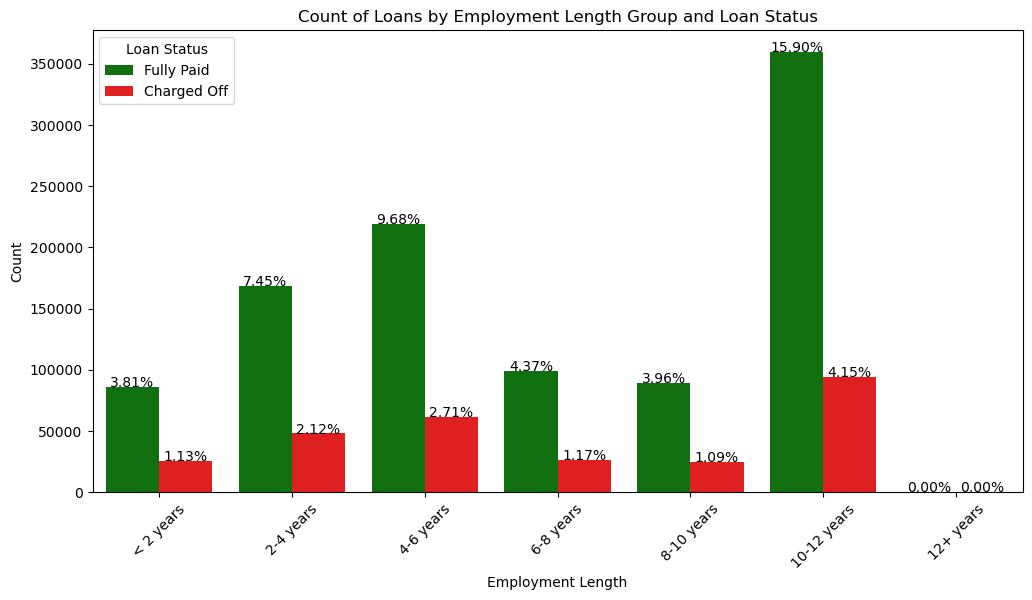

In [31]:
# Countplot of employment length by loan status
loan_main['emp_length_numeric'] = loan_main['emp_length'].replace({'< 1 year': 0, '1 year': 1,
                                                     '2 years': 2, '3 years': 3,
                                                     '4 years': 4, '5 years': 5,
                                                     '6 years': 6, '7 years': 7,
                                                     '8 years': 8, '9 years': 9,
                                                     '10+ years': 10})

# Create bins for employment length
bins = [-1, 1, 3, 6, 8, 10, 12, float('inf')]
labels = ['< 2 years', '2-4 years', '4-6 years', '6-8 years', '8-10 years', '10-12 years', '12+ years']
loan_main['emp_length_group'] = pd.cut(loan_main['emp_length_numeric'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='emp_length_group', hue='loan_status', data=loan_main,
                   palette={'Charged Off': 'red', 'Fully Paid': 'green'})

# Calculate percentage for each bar
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):  # Check if height is NaN
        height = 0
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.title('Count of Loans by Employment Length Group and Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

Employment lengths between 10 to 12 years have the highest count of both fully paid and charged off loans. Additionally, there are no instances of employment lengths exceeding 12 years.

`term`

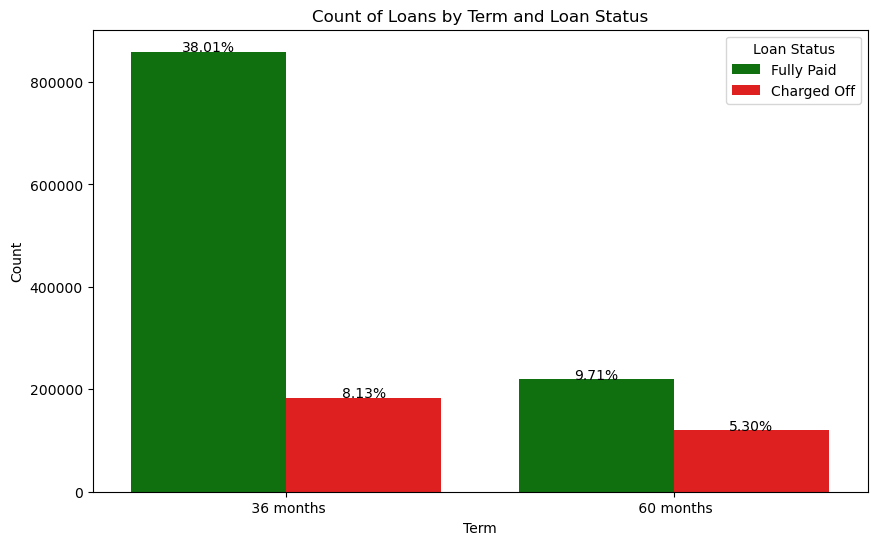

In [32]:
# Countplot of loan term by loan status
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='term', hue='loan_status', data=loan_main,
                   palette={'Charged Off': 'red', 'Fully Paid': 'green'})

# Calculate percentage for each bar
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):  # Check if height is NaN
        height = 0
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.title('Count of Loans by Term and Loan Status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

Loans with 36-months term are significantly most common among fully paid loans, while charged off loans show similar frequencies for both 36 and 60-month terms with less than 3% difference.

`grade`

In [33]:
loan_main['grade'].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G', nan], dtype=object)

In [34]:
loan_main.dropna(subset=['grade'], inplace=True)

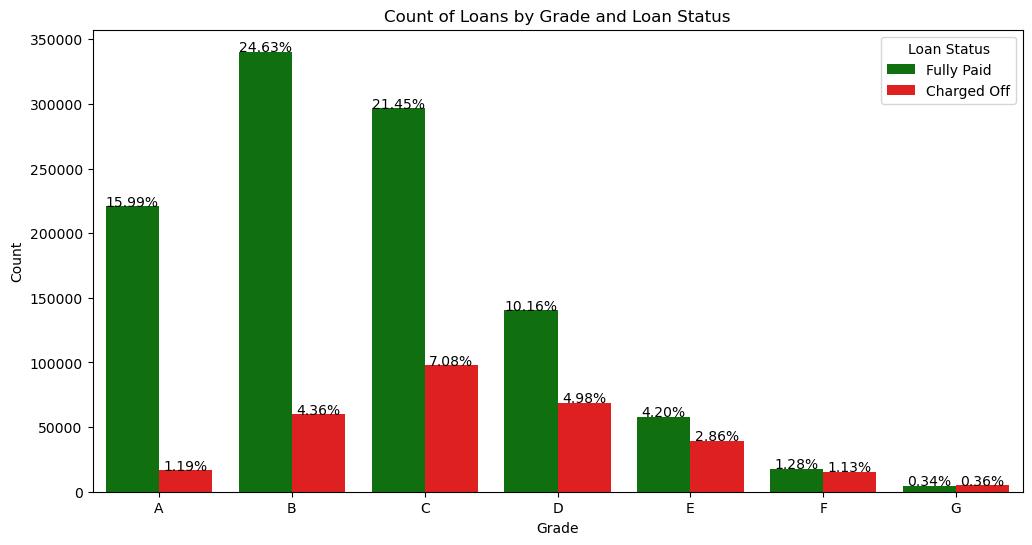

In [35]:
# Countplot of loan grade by loan status
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='grade', hue='loan_status', data=loan_main,
                   palette={'Charged Off': 'red', 'Fully Paid': 'green'},
                   order=sorted(loan_main['grade'].unique()))

# Calculate percentage for each bar
total = float(len(loan_main))
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):  # Check if height is NaN
        height = 0
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.title('Count of Loans by Grade and Loan Status')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

Fully paid loans display Grade B being the most common. Charged off loans, on the other hand, exhibit a normal distribution across grade categories, with Grade C being the most frequent. Both fully paid and charged off loan counts are almost the same for Grade G.

`sub_grade`

In [36]:
loan_main.dropna(subset=['sub_grade'], inplace=True)

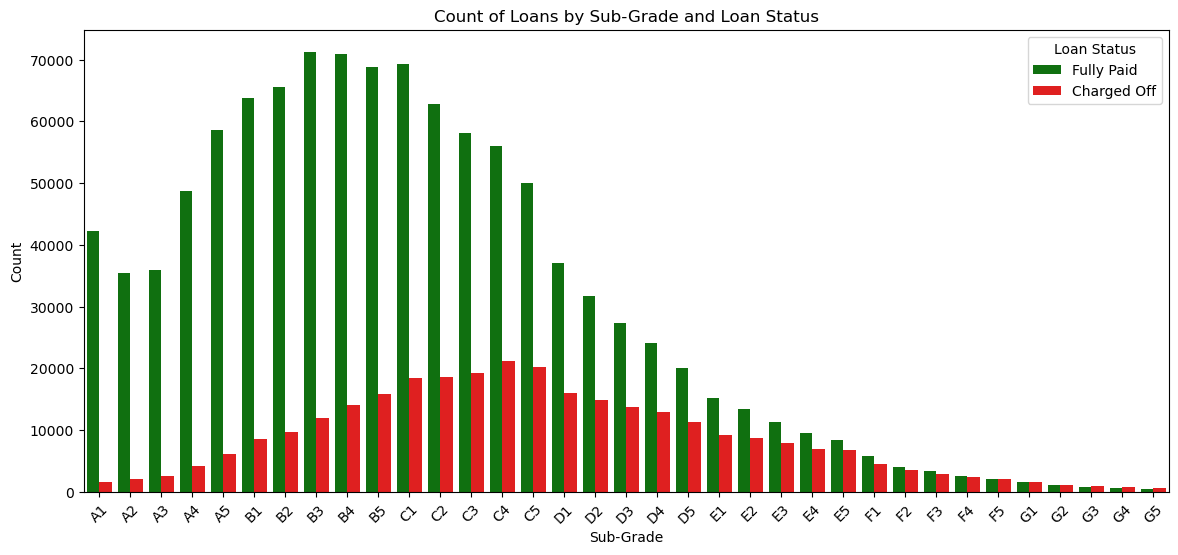

In [37]:
# Countplot of loan sub-grade by loan status
plt.figure(figsize=(14, 6))
sns.countplot(x='sub_grade', hue='loan_status', data=loan_main,
              palette={'Charged Off': 'red', 'Fully Paid': 'green'},
              order=sorted(loan_main['sub_grade'].unique()))
plt.title('Count of Loans by Sub-Grade and Loan Status')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.show()

The distribution of sub-grades provides additional information following the trend displayed for grades. Here, sub-grade B3 is the highest for fully paid, and sub-grade C4 for charged off loans.

`int_rate`

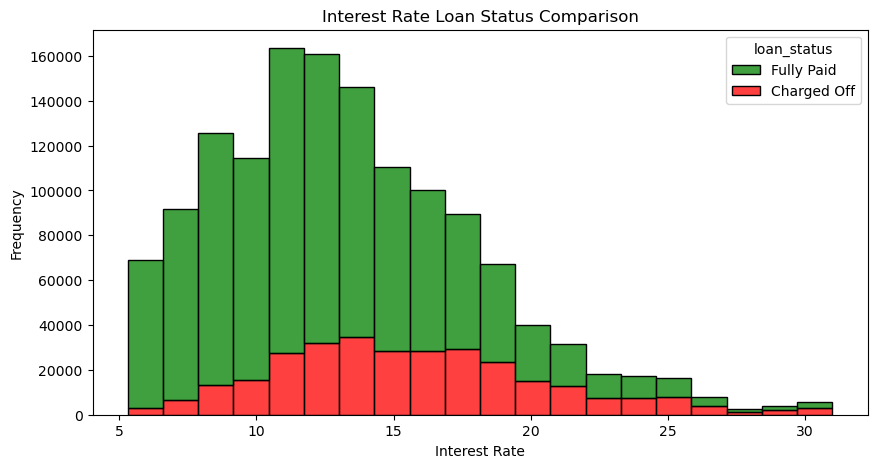

In [38]:
plt.figure(figsize=(10, 5))

sns.histplot(loan_main, x="int_rate", bins=20, hue="loan_status", multiple="stack", palette={'Charged Off': 'red', 'Fully Paid': 'green'})
plt.title("Interest Rate Loan Status Comparison")
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.show()

Based on the graph above, the higher the interest rate, the higher the probability of being charged off. The trend appears to be very strong and we may conclude that interest rate is a significant feature in predicting borrower's default risk.

`home_ownership`

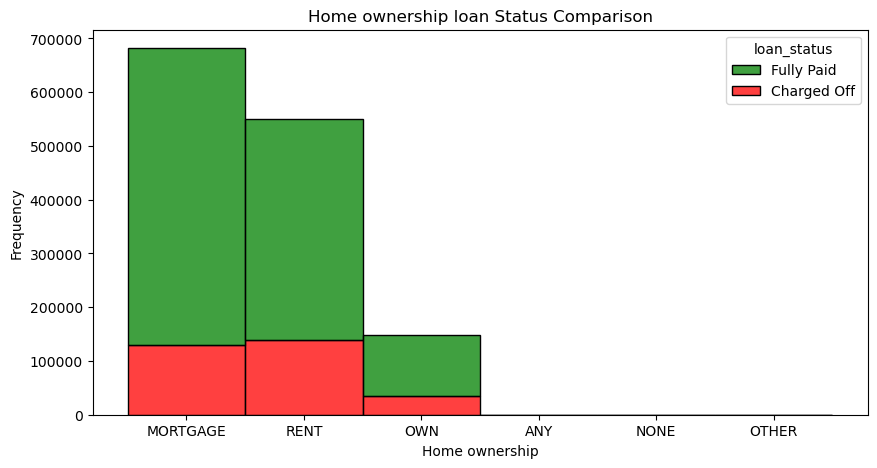

In [39]:
plt.figure(figsize=(10, 5))

sns.histplot(loan_main, x="home_ownership", bins=20, hue="loan_status", multiple="stack", palette={'Charged Off': 'red', 'Fully Paid': 'green'})
plt.title("Home ownership loan Status Comparison")
plt.xlabel("Home ownership")
plt.ylabel("Frequency")
plt.show()

In [40]:
df_home = loan_main[loan_main['loan_status'] == 'Charged Off'].groupby('home_ownership').count()[['loan_status']]

df_home_total = loan_main.groupby('home_ownership').count()[['loan_status']]

percent_co = df_home / df_home_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,home_ownership,Percentage Charged Off Loans
0,ANY,26.045016
1,MORTGAGE,19.084883
2,NONE,15.094340
3,OTHER,20.879121
4,OWN,22.858962
5,RENT,25.286676


The table above shows the % of charged off for each category. 

Based on the table above, RENT has the highest % of being charged off. Therefore, we can conclude that borrowers who rent are more likely to be charged off as compared to borrowers who own a mortgage.

`annual_inc`

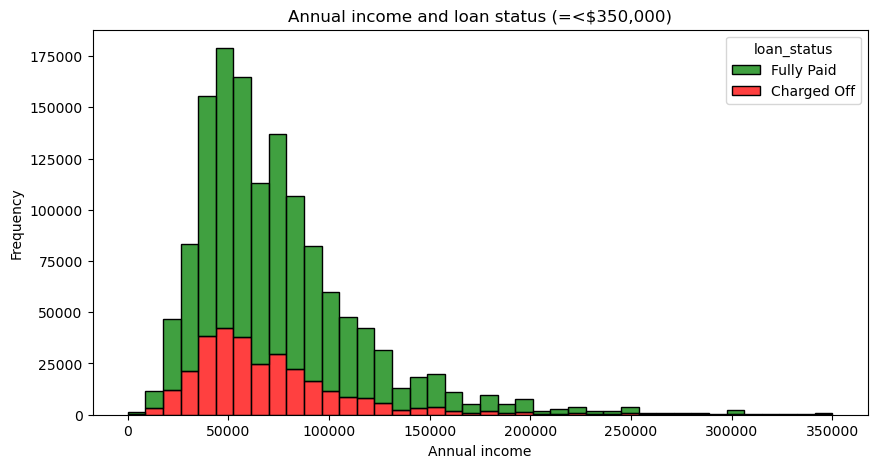

In [41]:
plt.figure(figsize=(10, 5))

sns.histplot(loan_main[loan_main['annual_inc']<=350000], x="annual_inc", bins=40, hue="loan_status", multiple="stack", palette={'Charged Off': 'red', 'Fully Paid': 'green'})
plt.title("Annual income and loan status (=<$350,000)")
plt.xlabel("Annual income")
plt.ylabel("Frequency")

plt.show()

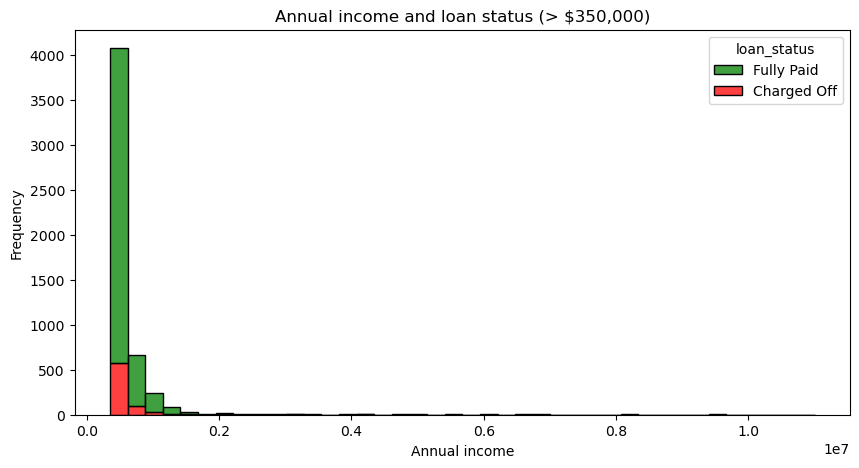

In [42]:
plt.figure(figsize=(10, 5))

sns.histplot(loan_main[loan_main['annual_inc']>350000], x="annual_inc", bins=40, hue="loan_status", multiple="stack", palette={'Charged Off': 'red', 'Fully Paid': 'green'})
plt.title("Annual income and loan status (> $350,000)")
plt.xlabel("Annual income")
plt.ylabel("Frequency")

plt.show()

Due to extreme outliers, the annual income is split into two categories, i.e. <350,000 and >350,000. For better trend visualization, the grouping in this scenario is set to bins=40. This grouping may/may not affect the trend.

Majority of the borrowers' annual income falls in the <350,000 category, with minority borrowers having more than >350,000 annual income. The probability of default decreases as the annual income increases.


`open_acc`

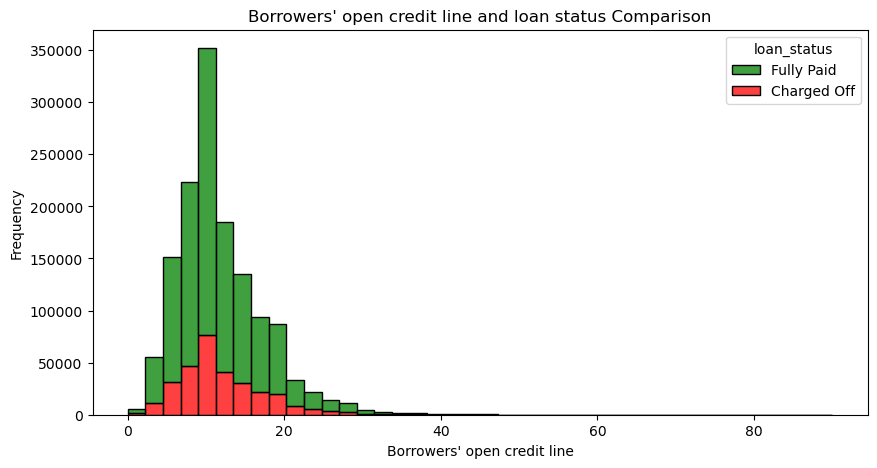

In [43]:
plt.figure(figsize=(10, 5))

sns.histplot(loan_main, x="open_acc", bins=40, hue="loan_status", multiple="stack", palette={'Charged Off': 'red', 'Fully Paid': 'green'})
plt.title("Borrowers' open credit line and loan status Comparison")
plt.xlabel("Borrowers' open credit line")
plt.ylabel("Frequency")
plt.show()

#Open_acc: The number of open credit lines in the borrower's credit file.

In [44]:
df_open = loan_main[loan_main['loan_status'] == 'Charged Off'].groupby('open_acc').count()[['loan_status']]

df_open_total = loan_main.groupby('open_acc').count()[['loan_status']]

percent_co = df_open / df_open_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()


,open_acc,Percentage Charged Off Loans
0,0.0,46.666667
1,1.0,31.886477
2,2.0,24.044555
3,3.0,21.463671
4,4.0,20.743731
...,...,...
79,82.0,NaN
80,84.0,NaN
81,86.0,NaN
82,88.0,NaN


The probability of being charged off decreases as the borrowers' open credit line increases. 

`pub_rec`

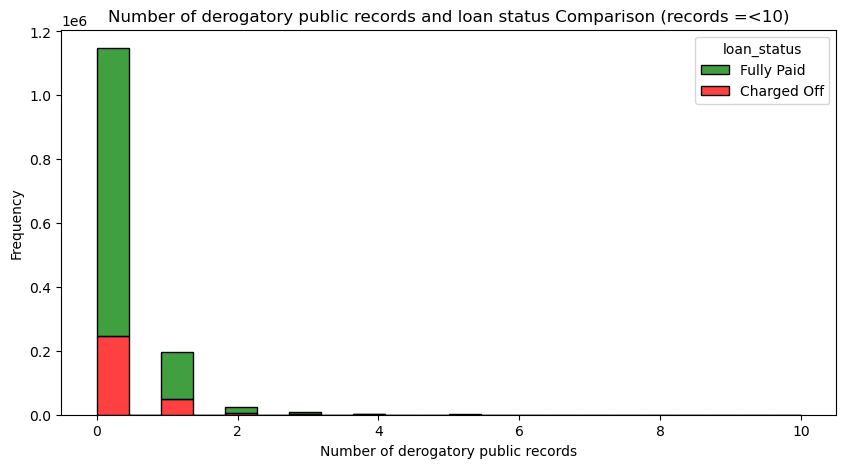

In [45]:
plt.figure(figsize=(10, 5))

sns.histplot(loan_main[loan_main['pub_rec']<=10], x="pub_rec", hue="loan_status", multiple="stack", palette={'Charged Off': 'red', 'Fully Paid': 'green'})
plt.title("Number of derogatory public records and loan status Comparison (records =<10)")
plt.xlabel("Number of derogatory public records")
plt.ylabel("Frequency")
plt.show()

#pub_rec: Number of derogatory public records

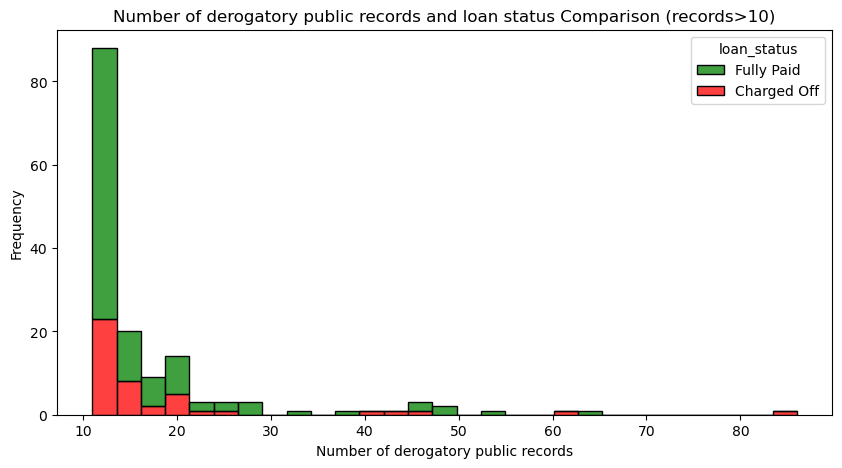

In [46]:
plt.figure(figsize=(10, 5))

sns.histplot(loan_main[loan_main['pub_rec']>10], x="pub_rec", hue="loan_status", multiple="stack", palette={'Charged Off': 'red', 'Fully Paid': 'green'})
plt.title("Number of derogatory public records and loan status Comparison (records>10)")
plt.xlabel("Number of derogatory public records")
plt.ylabel("Frequency")
plt.show()

In [47]:
df_rec = loan_main[loan_main['loan_status'] == 'Charged Off'].groupby('pub_rec').count()[['loan_status']]

df_rec_total = loan_main.groupby('pub_rec').count()[['loan_status']]

percent_co = df_rec / df_rec_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,pub_rec,Percentage Charged Off Loans
0,0.0,21.381856
1,1.0,24.711648
2,2.0,25.481038
3,3.0,24.743489
4,4.0,26.557864
5,5.0,24.251727
6,6.0,25.846154
7,7.0,24.067797
8,8.0,20.000000
9,9.0,23.809524


The data set is being split into <10 and >10 for better anaylsis.

Majority of the number of derogatory public records fall between 0 to 2. 
Most borrowers have <10 derogatory public records, and the average charge off rate is 26.22%

There is a small number of people who holds more than >10 derogatory public records. 
When the records > 10, the probability of being charged off is higher than when the records <10. 

`total_acc`

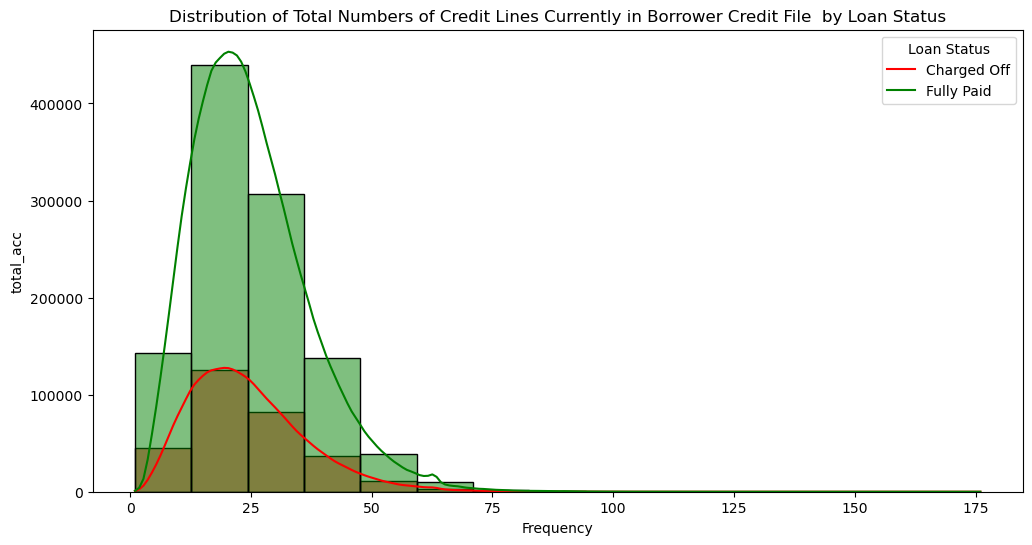

In [48]:
#Distribution of total numbers of credit lines currently in borrower's credit file by loan status
plt.figure(figsize=(12, 6))
sns.histplot(loan_main, x='total_acc', hue='loan_status', kde=True, palette={'Charged Off': 'red', 'Fully Paid': 'green'}, bins=15, legend=True)
plt.title('Distribution of Total Numbers of Credit Lines Currently in Borrower Credit File  by Loan Status')
plt.xlabel('Frequency')
plt.ylabel('total_acc')
plt.legend(title='Loan Status', labels=['Charged Off', 'Fully Paid'])
plt.show()

The distribution of fully paid loans is higher across all frequencies compared to charged-off loans, indicating that there are more fully paid accounts than charged-off accounts in the dataset.
The frequency of both loan statuses decreases as the number of credit lines increases, showing a right-skewed distribution.

`earliest_cr_line`

<function matplotlib.pyplot.show(close=None, block=None)>

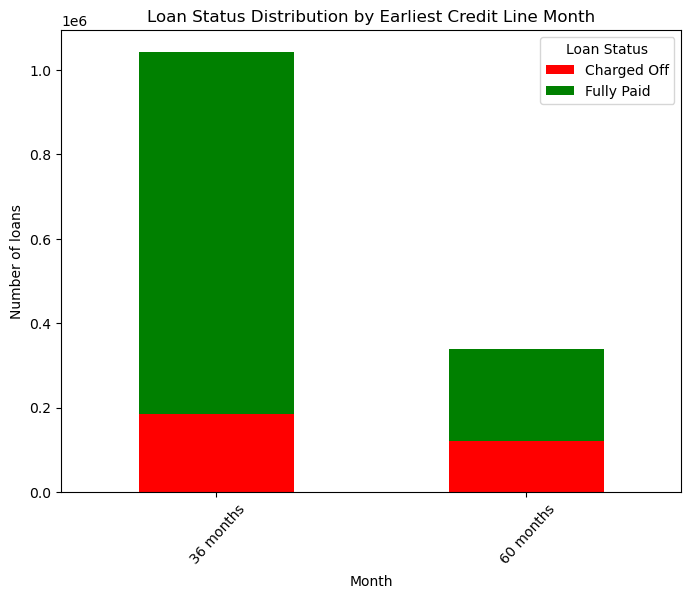

In [49]:
pivot_table = loan_main.pivot_table(index='term', columns='loan_status', aggfunc='size', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6),color={'Charged Off': 'red', 'Fully Paid': 'green'})
plt.title('Loan Status Distribution by Earliest Credit Line Month')
plt.ylabel('Number of loans')
plt.xlabel('Month')
plt.xticks(rotation=48)  
plt.legend(title='Loan Status')
plt.show

Loans with an earliest credit line opened at "36 months" are more common and have a higher likelihood of being fully paid compared to those at "60 months," although both categories exhibit a majority of loans being fully paid over being charged off.

`revol_util`

In [50]:
loan_main['revol_util']

0          29.7
1          19.2
2          56.2
4          64.5
5          68.4
           ... 
2260688    34.0
2260690    85.2
2260691    27.4
2260692    55.0
2260697    68.1
Name: revol_util, Length: 1382351, dtype: float64

[Text(0.5, 0, 'Loan status'), Text(0, 0.5, 'Revolving utilization rate')]

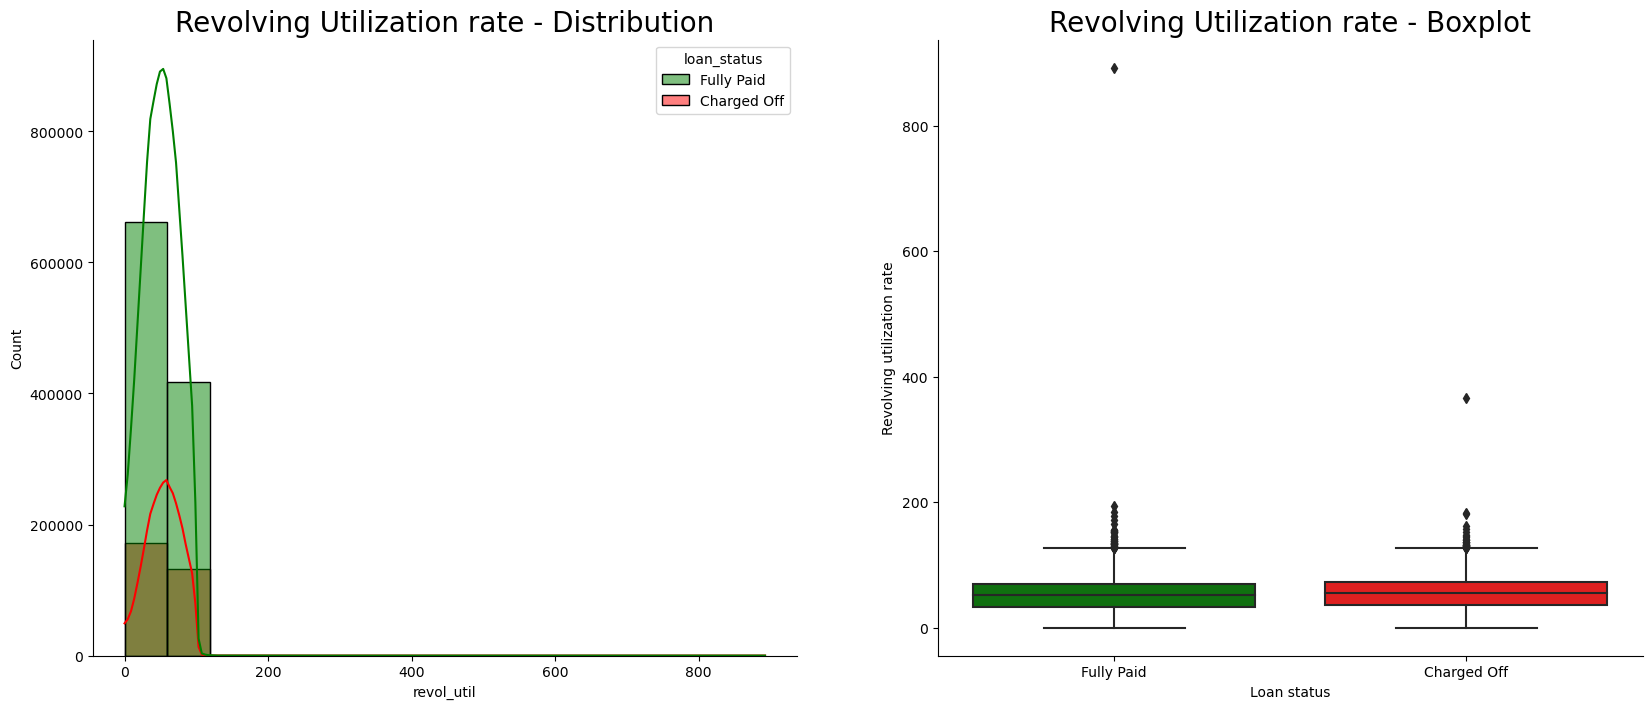

In [51]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='revol_util', ylabel='')
ax[0].set_title('Revolving Utilization rate - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('Revolving Utilization rate - Boxplot', size=20)

sns.histplot(data=loan_main,x="revol_util",hue="loan_status",bins=15,
             kde=True,ax=ax[0], palette={'Fully Paid': 'green', 'Charged Off': 'red'})
sns.boxplot(data=loan_main,x="loan_status",y="revol_util",ax=ax[1],palette={'Fully Paid': 'green', 'Charged Off': 'red'}).set(xlabel='Loan status', ylabel='Revolving utilization rate')

The majority of counts for both loan statuses are concentrated near the lower end of the Revolving Utilization Rate axis, which suggests that most borrowers use a lower portion of their available credit.
The peak of the distribution for both categories is very close to zero, indicating that the mode of the distribution is low.
The distribution for "Fully Paid" loans (in green) appears to be higher and more spread out than for "Charged Off" loans (in red), which implies a greater variety of utilization rates among borrowers who fully paid their loans.
There are several outliers for both loan statuses, as indicated by the points beyond the 'whiskers' of the boxplots. These outliers represent borrowers with unusually high or low Revolving Utilization Rates compared to the rest of the population.
In summary, loans that are fully paid tend to have lower revolving utilization rates, while charged-off loans have a higher and more variable range of utilization rates. This could indicate that borrowers with higher credit utilization are at a greater risk of not fulfilling their loan obligations.

`pub_rec_bankruptcies`

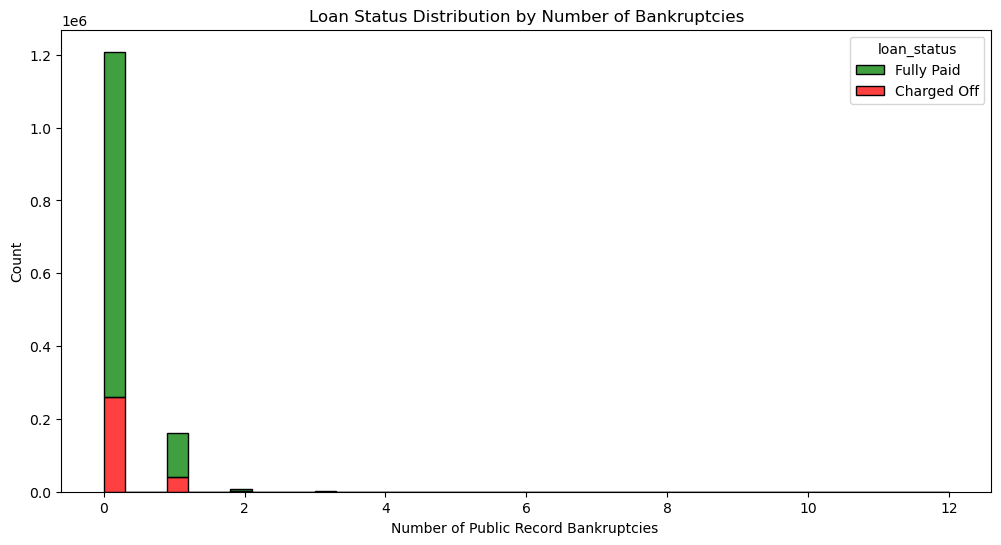

In [52]:
plt.figure(figsize=(12, 6))

sns.histplot(loan_main, x="pub_rec_bankruptcies", bins=40, hue="loan_status", multiple="stack", palette={'Fully Paid': 'green', 'Charged Off': 'red'})
plt.title("Loan Status Distribution by Number of Bankruptcies")
plt.xlabel("Number of Public Record Bankruptcies ")
plt.ylabel("Count")

plt.show()

The data indicates that borrowers with no public record of bankruptcy are more likely to fully pay off their loans, and the likelihood of both fully paying a loan and having a loan charged off decreases as the number of bankruptcies increases. This suggests that bankruptcy is a strong indicator of loan repayment risk.
For borrowers with one bankruptcy, there are still more fully paid loans than charged off, but the number of loans is significantly lower compared to borrowers with no bankruptcies.
As the number of bankruptcies increases to two or more, the number of loans drops drastically and becomes minimal.

In [53]:
df_co = loan_main[loan_main['loan_status'] == 'Charged Off'].groupby('pub_rec_bankruptcies').count()[['loan_status']]

df_total = loan_main.groupby('pub_rec_bankruptcies').count()[['loan_status']]

percent_co = df_co / df_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,pub_rec_bankruptcies,Percentage Charged Off Loans
0,0.0,21.556779
1,1.0,24.699318
2,2.0,26.453562
3,3.0,23.960273
4,4.0,29.556650
5,5.0,26.530612
6,6.0,34.782609
7,7.0,35.294118
8,8.0,44.444444
9,9.0,33.333333


`mort_acc`

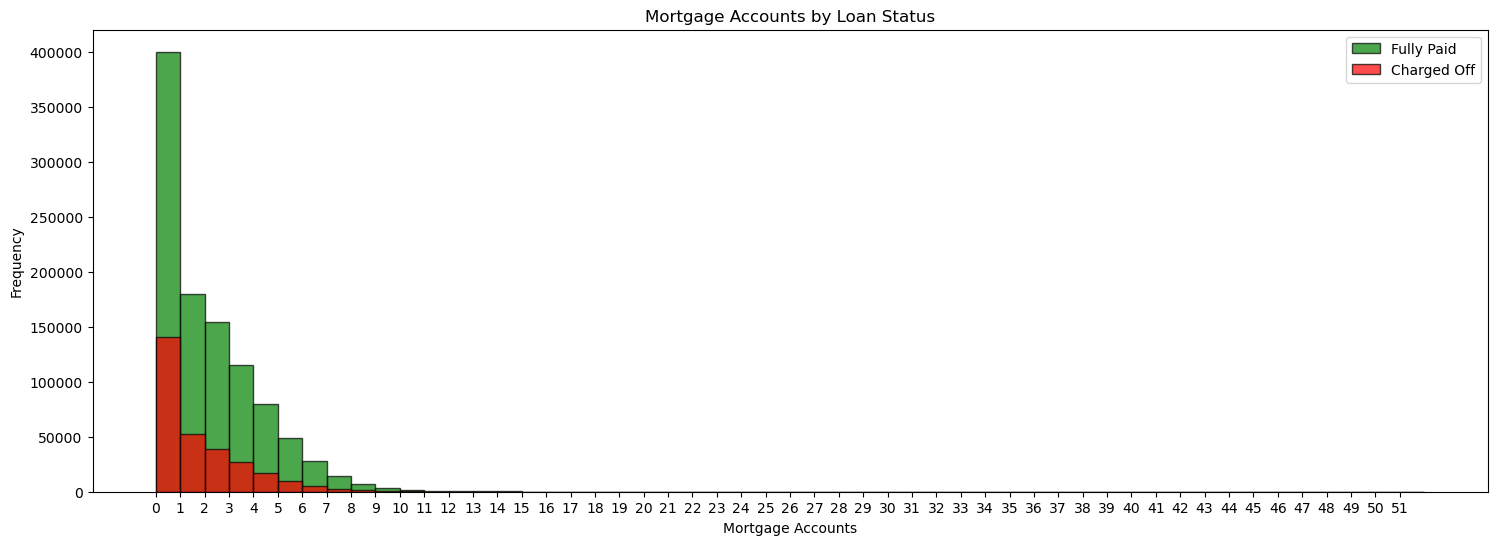

In [54]:
plt.figure(figsize=(18, 6))

status_colors = {'Fully Paid': 'green', 'Charged Off': 'red'}

for status, color in status_colors.items():
    subset = loan_main[loan_main['loan_status'] == status]
    plt.hist(subset['mort_acc'], bins=range(int(loan_main['mort_acc'].min()), int(loan_main['mort_acc'].max()) + 2), 
             alpha=0.7, label=status, color=color, edgecolor='black')

plt.title('Mortgage Accounts by Loan Status')
plt.xlabel('Mortgage Accounts')
plt.ylabel('Frequency')
plt.xticks(range(int(loan_main['mort_acc'].min()), int(loan_main['mort_acc'].max()) + 1))
plt.legend()
plt.show()

Most of the loans are paid off in full no matter how many mortgage accounts people have. There are generally fewer loans as people have more mortgage accounts, but there is a small increase again when people have four mortgage accounts. 

`emp_title`

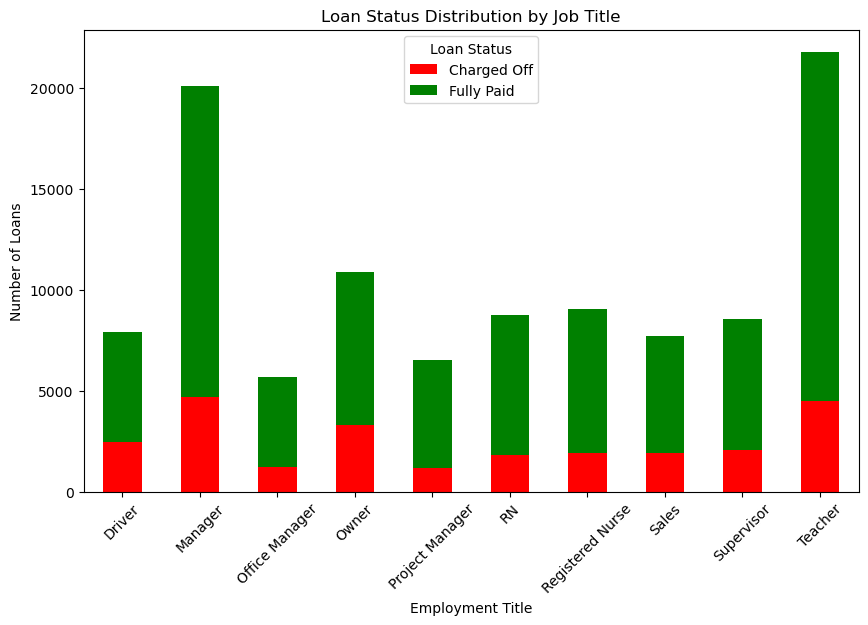

In [55]:
top_job_titles = loan_main['emp_title'].value_counts().nlargest(10).index
filtered_df = loan_main[loan_main['emp_title'].isin(top_job_titles)]

pivot_table = pd.crosstab(index=filtered_df['emp_title'], columns=filtered_df['loan_status'])

pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6),color = {'Fully Paid': 'green', 'Charged Off': 'red'} )
plt.title('Loan Status Distribution by Job Title')
plt.xlabel('Employment Title')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

The data suggests that certain professions, like "Teacher" and "Manager," may have a higher number of loans but also a higher rate of fully paying them off. In contrast, other professions like "Driver" and "Registered Nurse" have fewer loans in this dataset. This could potentially inform financial institutions about the loan repayment patterns associated with different employment titles.